https://aclanthology.org/2022.tacl-1.1/



In [5]:
# language_acquisition_analyzer.py

import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from typing import List, Dict, Tuple

class LinguisticFeatureTracker:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        self.syntax_patterns = defaultdict(int)
        self.semantic_roles = defaultdict(int)
        self.complexity_scores = []
        
    def analyze_syntax(self, text: str) -> Dict:
        doc = self.nlp(text)
        # Track dependency patterns
        deps = [(token.dep_, token.head.text) for token in doc]
        self.syntax_patterns[tuple(deps)] += 1
        # Calculate complexity
        tree_depth = max(len(list(token.ancestors)) for token in doc)
        return {
            'tree_depth': tree_depth,
            'unique_patterns': len(self.syntax_patterns)
        }
        
    def analyze_semantics(self, text: str) -> Dict:
        doc = self.nlp(text)
        # Track semantic roles and entities
        for ent in doc.ents:
            self.semantic_roles[ent.label_] += 1
        return {
            'unique_roles': len(self.semantic_roles),
            'entity_density': len(doc.ents) / len(doc)
        }

class AcquisitionAnalyzer:
    def __init__(self, window_size: int = 100):
        self.tracker = LinguisticFeatureTracker()
        self.window_size = window_size
        self.metrics_history = defaultdict(list)
        
    def process_batch(self, texts: List[str]) -> None:
        syntax_metrics = []
        semantic_metrics = []
        
        for i in range(0, len(texts), self.window_size):
            batch = texts[i:i+self.window_size]
            batch_text = ' '.join(batch)
            
            syntax = self.tracker.analyze_syntax(batch_text)
            semantics = self.tracker.analyze_semantics(batch_text)
            
            for k, v in {**syntax, **semantics}.items():
                self.metrics_history[k].append(v)
                
    def plot_acquisition_curves(self):
        plt.figure(figsize=(15, 8))
        for metric, values in self.metrics_history.items():
            plt.plot(values, label=metric)
        plt.xlabel('Training Steps')
        plt.ylabel('Metric Value')
        plt.title('Language Feature Acquisition Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

In [7]:
def verify_spacy_model():
    """Verify spacy model is installed"""
    try:
        return spacy.load('en_core_web_sm')
    except OSError:
        print("Downloading required spacy model...")
        import subprocess
        subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
        return spacy.load('en_core_web_sm')

Analyzing language acquisition patterns...

Plotting acquisition curves...


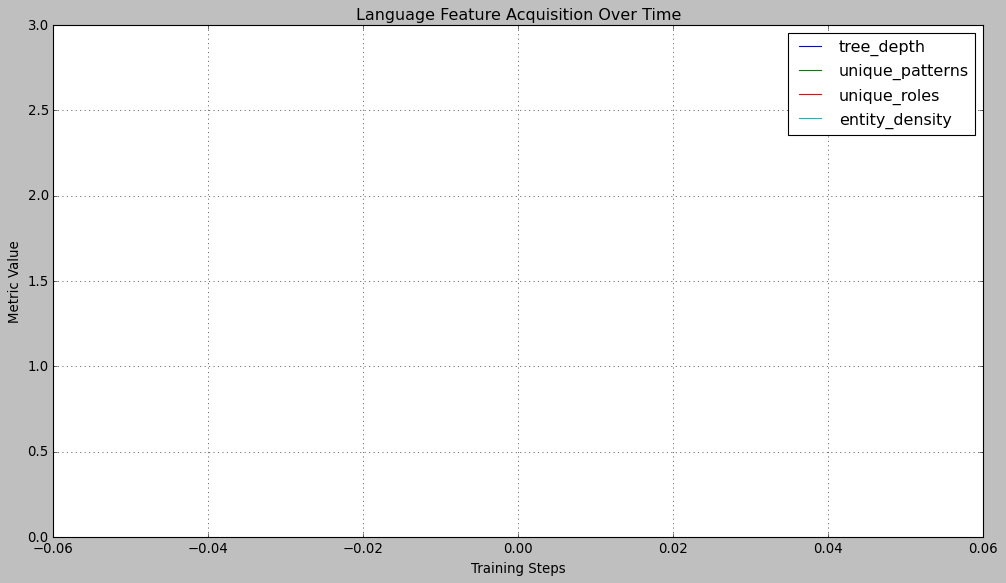


Summary of tracked features:
tree_depth: 3
unique_patterns: 1
unique_roles: 0
entity_density: 0.0


In [9]:
# example_analysis.py

import matplotlib.pyplot as plt
import numpy as np
# from language_acquisition_analyzer import AcquisitionAnalyzer

def main():
    # Use built-in matplotlib style
    plt.style.use('classic')
    
    try:
        # Initialize analyzer
        analyzer = AcquisitionAnalyzer(window_size=50)

        # Example model outputs showing progression
        model_outputs = [
            # Basic sentences
            "The cat sits.",
            "A dog runs.",
            # Adding modifiers
            "The big cat chases mice.",
            "The brown dog runs fast.",
            # Complex structures
            "If it rains, the cat stays inside.",
            "The dog that barked was hungry.",
            # Multiple clauses
            "The cat caught the mouse while the dog watched.",
            "Although it was raining, the dog wanted to play outside."
        ]

        # Process and analyze
        print("Analyzing language acquisition patterns...")
        analyzer.process_batch(model_outputs)
        
        # Generate visualizations
        print("\nPlotting acquisition curves...")
        analyzer.plot_acquisition_curves()
        
        # Print summary statistics
        print("\nSummary of tracked features:")
        for metric, values in analyzer.metrics_history.items():
            print(f"{metric}: {values[-1]}")

    except Exception as e:
        print(f"Error during analysis: {e}")
        raise

if __name__ == "__main__":
    main()

Analyzing language acquisition patterns...

Plotting acquisition curves...


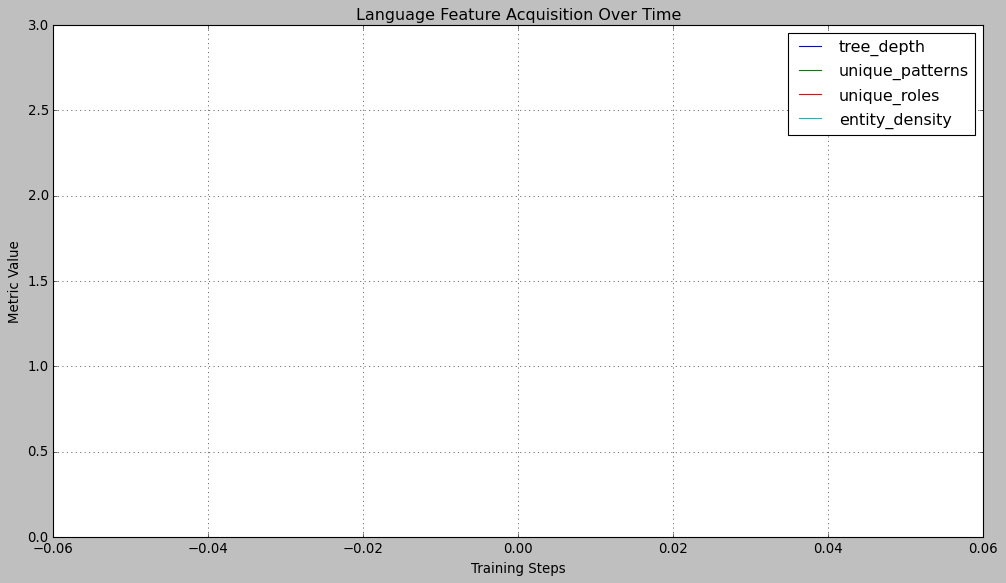


Summary of tracked features:
tree_depth: 3
unique_patterns: 1
unique_roles: 0
entity_density: 0.0


In [10]:
main()